## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


# Figures 1: Compare Image Fidelity for Different Algorithms 

In [2]:
np.random.seed(0)
from problems.CSMRI import CSMRI

im_height, im_width = 256, 256  # Image dimensions
samp_rate = 0.5                 # Pick a number 0 < SR <= 1
sigma_true = 5.0                # Select std dev of AWGN

main_problem = CSMRI('./data/Set12/13.png', H=im_height, W=im_width, sample_prob=samp_rate, sigma=sigma_true)

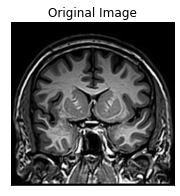

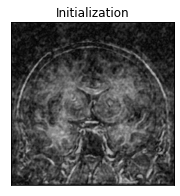

In [3]:
main_problem.display(show_measurements=False, save_results=True)

In [5]:
np.random.seed(0)
from denoisers.NLM import NLMDenoiser
denoiser = NLMDenoiser(sigma_est=1, patch_size=4, patch_distance=5)
results = pnp_svrg(main_problem, denoiser=denoiser, eta=5e-3, tt=10, T2=50, mini_batch_size=100, verbose=True)

0 0 Before denoising:  17.792264954764892
After denoising update: 0 0 15.395936172988321
0 1 Before denoising:  15.40835102839974
After denoising update: 0 1 15.210861644478747
0 2 Before denoising:  15.221527358991853
After denoising update: 0 2 15.052845863589027
0 3 Before denoising:  15.068954993948937
After denoising update: 0 3 14.962893307070175
0 4 Before denoising:  14.977591033067055
After denoising update: 0 4 14.89220051892536
0 5 Before denoising:  14.919117367177819
After denoising update: 0 5 14.848421151058474
0 6 Before denoising:  14.861755714155517
After denoising update: 0 6 14.808146479101659
0 7 Before denoising:  14.823818783338115
After denoising update: 0 7 14.774507396539976
0 8 Before denoising:  14.787291452148551
After denoising update: 0 8 14.740291269054929
0 9 Before denoising:  14.752882307353572
After denoising update: 0 9 14.712278286543041
0 10 Before denoising:  14.72965153874057
After denoising update: 0 10 14.689315761585164
0 11 Before denoising:

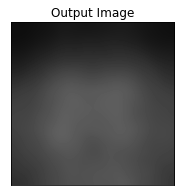

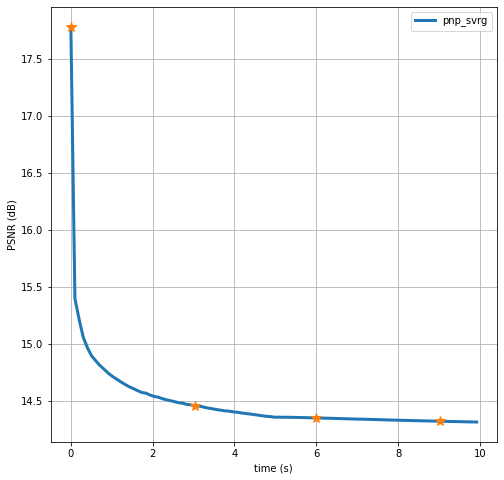

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Output PSNR: 14.3	Change in PSNR: 1.91	Gradient Time: 7.99	Denoising Time: 7.99


In [6]:
master_psnr_fig = display_results(main_problem, results, save_results=True)

In [ ]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_SARAH_1, time_SARAH_1, psnr_SARAH_1, zs_SARAH = pnp_sarah(main_problem, denoiser=denoiser, eta=2500, tt=200, T2=20, mini_batch_size=2000, verbose=True)

In [ ]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_GD_1, time_GD_1, psnr_GD_1, zs_GD = pnp_gd(main_problem, denoiser=denoiser, eta=2000, tt=200, verbose=True)

In [ ]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_SGD_1, time_SGD_1, psnr_SGD_1, zs_SGD = pnp_sgd(main_problem, denoiser=denoiser, eta=1000, tt=200, mini_batch_size=2000, verbose=True)

In [ ]:
np.random.seed(0)
denoiser = CNNDenoiser(device=device, cnn_decay=0.96)
z_SVRG_2, time_SVRG_2, psnr_SVRG_2, zs_SVRG = pnp_svrg(main_problem, denoiser=denoiser, eta=12500, tt=30, T2=5, mini_batch_size=2000, verbose=True)

In [ ]:
np.random.seed(0)
denoiser = CNNDenoiser(device=device, cnn_decay=0.96)
z_GD_2, time_GD_2, psnr_GD_2, zs_GD = pnp_gd(main_problem, denoiser=denoiser, eta=10000, tt=30, verbose=True)

In [ ]:
np.random.seed(0)
denoiser = CNNDenoiser(device=device, cnn_decay=0.95)
z_SGD_2, time_SGD_2, psnr_SGD_2, zs_SGD = pnp_sgd(main_problem, denoiser=denoiser, eta=4000, tt=30, mini_batch_size=2000, verbose=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images